# <center> Статистика(1)
## <center>Домашняя работа №3
#### Выполнила: Александра Ольховатова
#### группа: pyda-8a

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
from sklearn import preprocessing
from scipy.stats import pearsonr
import seaborn as sns

**Загрузить датасет по url:**

In [141]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df_1=pd.read_csv(url)

Контекст

Доклад о мировом счастье - это знаковое исследование состояния глобального счастья, которое ранжирует 156 стран по тому, насколько счастливыми их граждане считают себя. В этом году в докладе о мировом счастье основное внимание уделяется счастью и обществу: как счастье развивалось в течение последних десяти лет, с акцентом на технологии, социальные нормы, конфликты и государственную политику, которые привели к этим изменениям.


*  **Country (region)** Name of the country. Название страны.
*  **Ladder** Cantril Ladder is a measure of life satisfaction. Cantril Ladder - это мера удовлетворенности жизнью.
*  **SD of Ladder** Standard deviation of the ladder. Стандартное отклонение ladder.
*  **Positive affect** Measure of positive emotion. Мера положительных эмоций.
*  **Negative affect** Measure of negative emotion. Мера отрицательных эмоций.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score. Степень, в которой социальная поддержка способствовала подсчету балла счастья.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score. Степень, в которой свобода способствовала подсчету балла счастья.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score. Степень, в которой восприятие коррупции способствует оценке счастья.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score. Степень, в которой щедрость способствовала подсчету балла счастья.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score. Степень, в которой ВВП вносит свой вклад в расчет показателя счастья.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score. Степень, в которой ожидаемая продолжительность жизни способствовала вычислению показателя счастья.

**Посмотреть первые несколько рядов таблицы**

In [142]:
df_1[:1]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0


**Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?**

Распределение равномерное, это видно из построенных графиков ниже. Плотность вероятности колеблется около одного и того же значения вероятности. 

In [143]:
#заменила пустые значения нулями
df = df_1.fillna(0)

In [144]:
#Переназначила выборки
freedom = df['Freedom']
positive_affect = df['Positive affect']

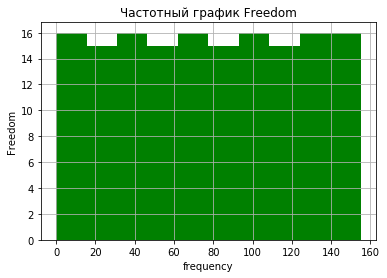

In [145]:
n, bins, patches = plt.hist(df['Freedom'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

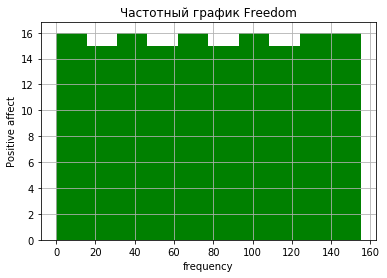

In [146]:
n, bins, patches = plt.hist(df['Positive affect'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

**Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom**

In [148]:
print('Медиана: ', statistics.median(freedom))
#print('Значение моды:', statistics.mode(freedom))
print('Мат.ожидание: ', sum(freedom)/len(freedom))
print('Мат.ожидание: ', statistics.mean(freedom))
print('Стандратное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.pvariance(freedom))
print('Минимум: ', min(freedom))
print('Максимум: ', max(freedom))
print('Размах: ', max(freedom) - min(freedom))

Медиана:  77.5
Мат.ожидание:  77.5
Мат.ожидание:  77.5
Стандратное отклонение:  45.032395746469746
Дисперсия:  2027.9166666666667
Минимум:  0.0
Максимум:  155.0
Размах:  155.0


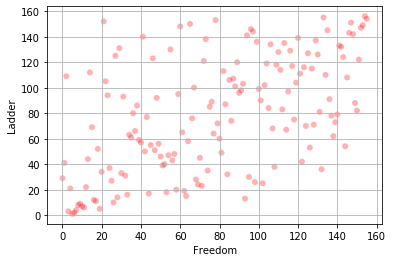

In [149]:
#Выбросы
df['Freedom'].isnull().sum()
duration = df['Freedom']
year = df['Ladder']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

Явных выбросов нет

**Почему нельзя найти моду?**

По методу statistics.mode(freedom), моду посчитать не удалось т.к все значения имеют встречаются нам с двумя вариантами вероятностей, да есть группа чисел с вероятностью вышем чем у другой, но внутри этих групп равномерное распределение вероятностей между значениями а значит выделить какое-то одно чаще встречающиеся просто невозможно, его нет.

**Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?**

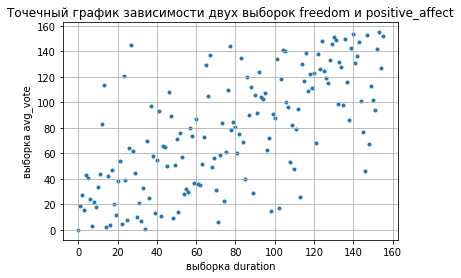

In [151]:
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок freedom и positive_affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

Коэффициент корреляции Пирсона: 0.6878506740844936


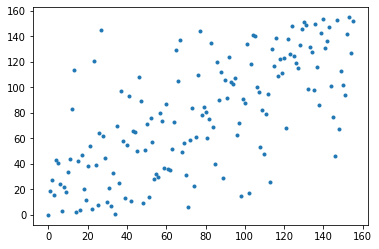

In [152]:
corr, p_value = pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона чувствителен к выбросам можно сказать что у нас выбросы отсутсвуют, поэтому наш коэффициент не искажается. У нас получился результат 0,68 что говорит нам о средней корреляции между выборками и она положительная (прямая).

**Нормализовать данные колонки Freedom (централизация + масштабирование)**

In [153]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [154]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


**Построить матрицу корреляций для всех колонок таблицы**

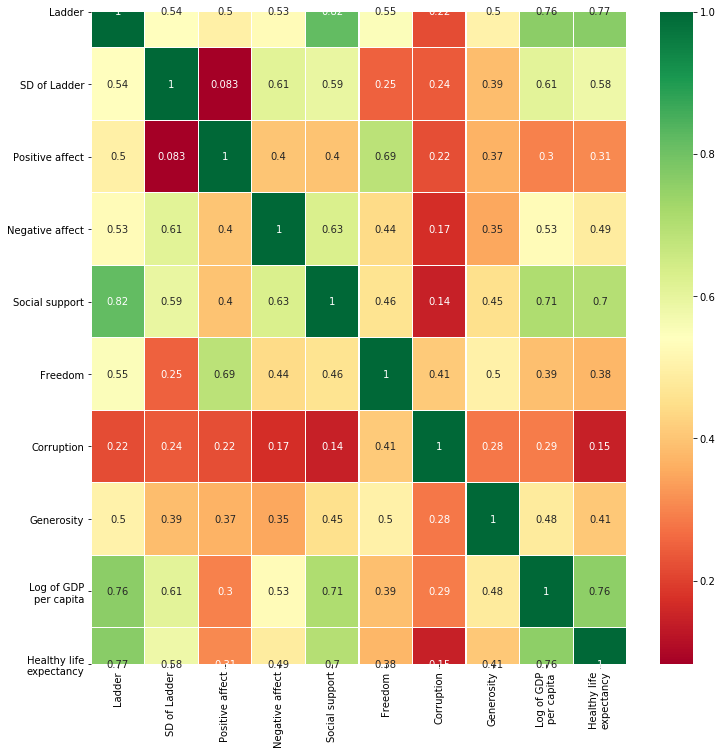

In [155]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


**Загрузить таблицу цен на авокадо:**

In [156]:
ssl._create_default_https_context = ssl._create_unverified_context
df_2=pd.read_csv('avocado.csv', index_col=False)

In [157]:
df_2[:1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


**Сделать частотный график колонки AveragePrice. Какое это распределение?**

Это распределение нормальное.

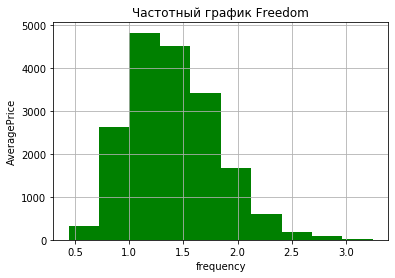

In [158]:
n, bins, patches = plt.hist(df_2['AveragePrice'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

**Найти корреляцию в следующих колонках:**

**колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?**

In [159]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df_2[['AveragePrice', '4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)

x = df_norm[0]
y = df_norm[1]
l = df_norm[2]
m = df_norm[3]

corr_1, p_value = pearsonr(x, y)
corr_2, p_value = pearsonr(x, l)
corr_3, p_value = pearsonr(x, m)

print("Корреляция между 4046 и Average Price: ",corr_1)
print("Корреляция между 4225 и Average Price: ",corr_2)
print("Корреляция между 4770 и Average Price: ",corr_3)

Корреляция между 4046 и Average Price:  -0.2083170484878848
Корреляция между 4225 и Average Price:  -0.17292777250933541
Корреляция между 4770 и Average Price:  -0.17944598397975625


Между всеми столбцами корреляция очень слабая и обратная (отрицательная).